<a href="https://colab.research.google.com/github/dis-is-pj/Mobile-Price-range-Prediction/blob/main/Prashant_Jha_Mobile_Price_Range_Classification_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

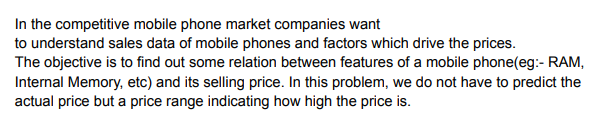

Data Fields:

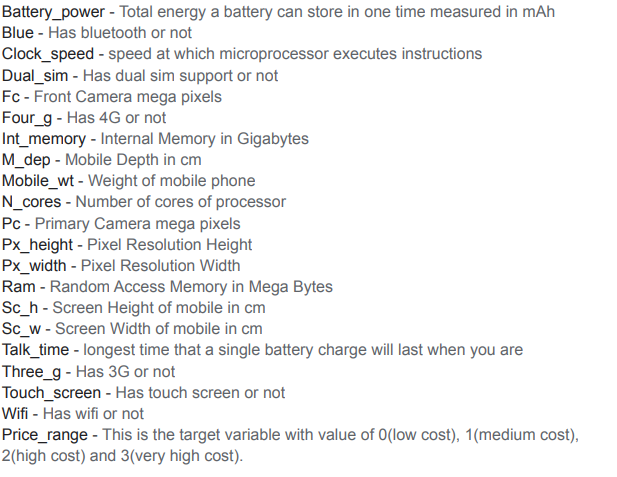

# Data Exploration


Some distribution tables are created in excel and snapshots are attached here.

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# loading the Dataset
path = '/content/drive/MyDrive/Cohort Nilgiri/Module 4/Capstone Project 3/data.csv'

df = pd.read_csv(path)

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
columns = df.columns

columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Let's analyze the features value distribution for each target class.

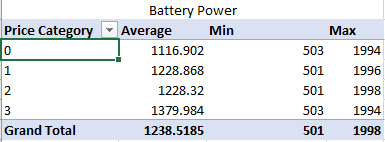

Here if we look at the average battery power, it doesn't really change much along the target catagories. Also the Min values and Max values are almost same. That means this feature alone is not going to be very helpful in prediction.

Let's look at the same kind of distribution for all features.

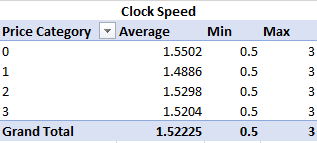

The Clock Speed distribution is similar along the price range except 0 and 1.

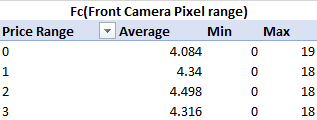

This features distribution is almost similar along the target variable, it may not be helpful in making predictions.

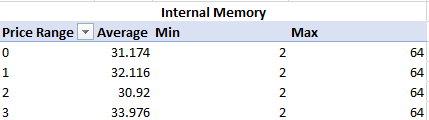

There is a little variation in the Internal Memory along the Price range. This feature could be helpful in predicting the Price range.

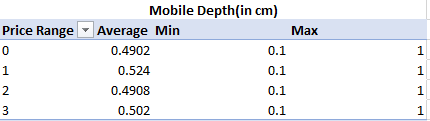

Mobile depth again has somewhat similar kind of distribution.

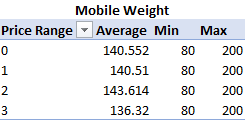

Mobile weight is reduced a little bit in the Price category-3 which means costly phones are ligher. 

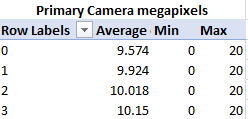

Primary camera megapixels are showing a little variation along the target categories, which is a good sign for prediction.

This is a feature that was not given in the dataset and was generated manually with the help of two features screen_height and screen_width. Instead of Screen height and width, we can keep this feature in the dataset to handle multicollinearity.

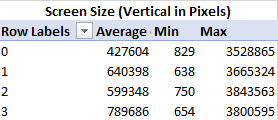

Screen Size shows very good variation along the target variables. This can play a major role in predicting the target categories.

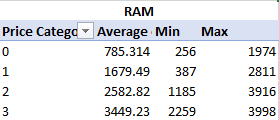

Ram is also showing a signifiant distribution along the target variable. Which is a good sign for making predictions.

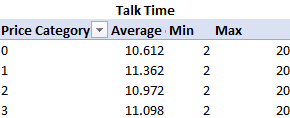

Talk time is not varying much in the different price ranges.